# **JSON Output**

### **Obtener Gemini API key**

Para obtener el API key de Gemini es necesario acceder a:
https://aistudio.google.com/


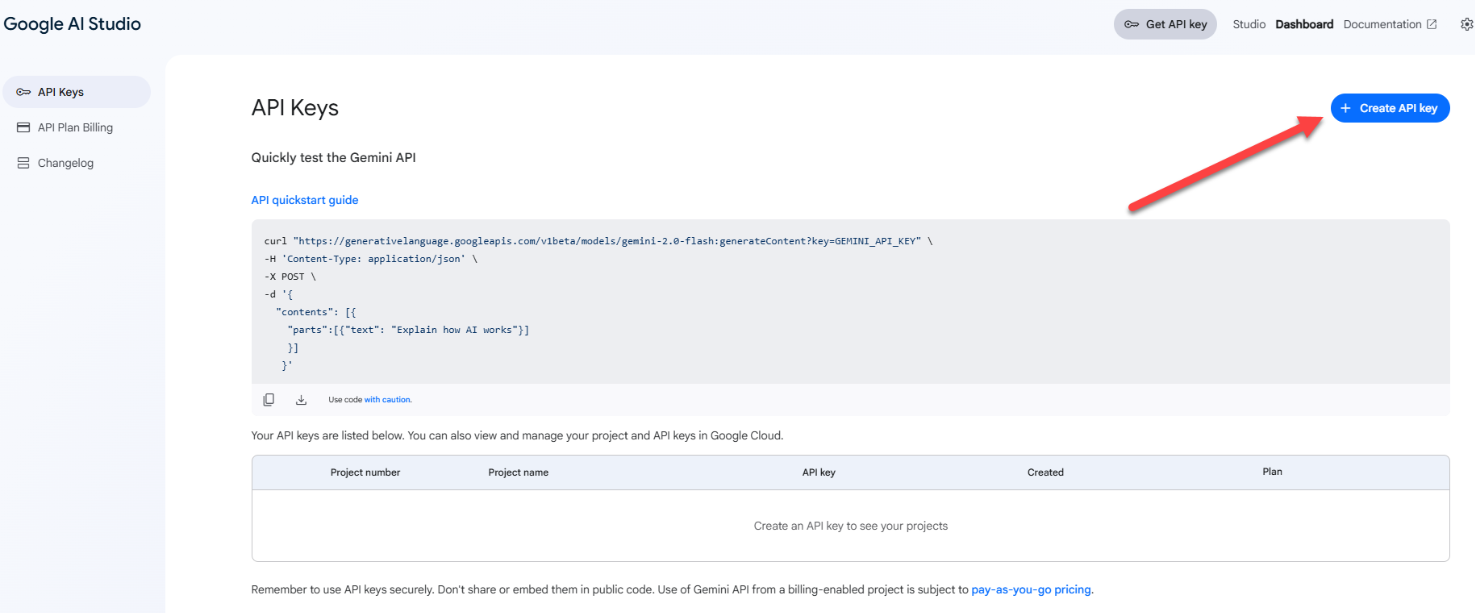

### **Instalar e importar librerias**

In [ ]:
%pip install openai
from openai import OpenAI
from google.colab import userdata
import json

### **Acceder a gemini**

In [ ]:
client = OpenAI(
    api_key=userdata.get('GOOGLE_API_KEY'),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

texto = "Alberto compró 3 tenis por 5000 pesos el 27 de Junio en Dportenis."

### **¿Qué es JSON Output?**
Cuando hablamos de "**JSON Output**" en el contexto de un modelo de lenguaje o una herramienta de generación de texto, nos referimos a la capacidad de obtener la respuesta directamente en formato JSON, lo que facilita su procesamiento programático. Es ideal para:

* Automatizar extracción de datos
* Rellenar formularios
* Integrar con APIs o apps

### **Ejemplo de JSON Output**
En el ejemplo siguiente es posible observar como especificando por medio del prompt y utilizando texto pequeño se puede extraer información precisa en un JSON:

In [ ]:
message = [
        {
            "role": "user",
            "content": (
                f"""
              Dame la información de esta persona en formato JSON: cliente, producto, cantidad, precio_total, fecha, lugar.

              Texto: {texto}

              """
            )
        }
    ]

response = client.chat.completions.create(
  model="models/gemini-2.0-flash",
  messages=message)


### **Strip = False**

Cuando no se aplica Strip a nuestra salida, el JSON de salida puede incluir caracteres adicionales o formato "bonito" (pretty-print) que lo hacen más legible para los humanos. Puede haber espacios en blanco, saltos de línea y sangrías.

In [ ]:
print(response.choices[0].message.content)

**¿Qué sucede si intentamos parsear la respuesta anterior del modelo a JSON sin aplicar una técnica de Strip?**

---



In [ ]:
json.loads(response.choices[0].message.content)

### **Strip = True**
Cuando se aplica strip, el JSON de salida se "limpia" de cualquier carácter que no sea parte de la estructura JSON válida. Esto significa que se eliminan espacios en blanco, saltos de línea o cualquier texto "extra" que pueda rodear el JSON. El resultado es un JSON compacto y a menudo en una sola línea.

1. Limpiar el texto generado por el modelo eliminando espacios en blanco y marcas de código markdown (```json y ```) para dejar solo el JSON puro.

In [ ]:
cleanedJson = response.choices[0].message.content.strip().replace("```json", "").replace("```", "").strip()
print(cleanedJson)

2. Se construye un mensaje de sistema que le indica al modelo Gemini que responda únicamente con un objeto JSON limpio y estructurado y el usuario envía su instrucción acompañada del texto que se requiere que se extraiga información.

In [ ]:
message = [
        {
            "role": "system",
            "content": (
              "Eres un asistente que responde *únicamente* con un objeto JSON plano. "
            "No uses ningún bloque de markdown como ```json o ```; "
            "responde solo con el JSON en texto plano sin comillas envolventes, sin explicación ni formato adicional. "
            "Solo el objeto JSON puro."
            )
        },
        {
            "role": "user",
            "content": (
                f"""
                Dame la información estructurada de esta persona en formato JSON.

                Texto: {texto}

              """
            )
        }
    ]

response = client.chat.completions.create(
  model="models/gemini-2.0-flash",
  messages=message)

print(response.choices[0].message.content.strip())

3. Se envía al modelo Gemini una instrucción clara para que actúe como un asistente que responde únicamente con un objeto JSON limpio, usando una estructura específica y extraída de un texto dado, sin incluir bloques de código ni contenido adicional y el usuario envía su instrucción acompañada del texto que se requiere que se extraiga información y los datos exactos que requiere en su respuesta.

In [ ]:
message = [
        {
            "role": "system",
            "content": (
              "Eres un asistente que responde *únicamente* con un objeto JSON plano. "
            "No uses ningún bloque de markdown como ```json o ```; "
            "responde solo con el JSON en texto plano sin comillas envolventes, sin explicación ni formato adicional. "
            "Solo el objeto JSON puro."
            )
        },
        {
            "role": "user",
            "content": (
              f"""
                Dame la información estructurada de esta persona en formato JSON solo con la siguiente información: cliente, producto, cantidad, precio_total, fecha, lugar.
                Texto: {texto}
              """
            )
        }
    ]

response = client.chat.completions.create(
  model="models/gemini-2.0-flash",
  messages=message)

print(response.choices[0].message.content.strip())

## **Ejercicio 01**

Utilizando el siguiente código, formula tu propia salida estructurada JSON:

In [ ]:
texto = ""

message = [
        {
            "role": "system",
            "content": (

            )
        },
        {
            "role": "user",
            "content": (
              f"""

              Texto: {texto}
              """
            )
        }
    ]

response = client.chat.completions.create(
  model="models/gemini-2.0-flash",
  messages=message)

print(response.choices[0].message.content.strip())